In [1]:
import random as rd
import math as mt
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
semilla = int((101187 + 102323 + 102291 + 102321) / 4)
Xo = semilla
def generador_congruencial_lineal_normalizado(iteraciones):
  m=2**32
  a=1013904223
  c=1664525
  global Xo

  numeros_aleatorios = []
  for i in range(0,iteraciones):
    X = (a * Xo + c) % m
    numeros_aleatorios.append(X/m)
    Xo = X
  return numeros_aleatorios

In [3]:
#Funciones auxiliares

#El cuadrado esta delimitado por las rectas:
#1) y = x + 5.sqrt(2)
#2) y = -x + 40 - 5.sqrt(2)
#3) y = x - 5.sqrt(2)
#4) y = -x + 40 + 5.sqrt(2)

#Indica si el punto está en la región determinada por el enunciado
def esta_en_la_region(tupla_xy):
    if (tupla_xy[0] > 20 + 5 * mt.sqrt(2)) or (tupla_xy[0] < 20 - 5 * mt.sqrt(2)):
        return false
    if tupla_xy[0] <= 20:
        return (tupla_xy[1] <= (tupla_xy[0] + 5 * mt.sqrt(2))) and \
               (tupla_xy[1] >= (-tupla_xy[0] + 40 - 5 * mt.sqrt(2)))
    return (tupla_xy[1] >= (tupla_xy[0] - 5 * mt.sqrt(2))) and \
               (tupla_xy[1] <= (-tupla_xy[0] + 40 + 5 * mt.sqrt(2)))   

#Se mueve el punto a la región pedida por el enunciado
def desplazar(x, y):
    nuevo_x = x*mt.cos(mt.pi/4)-y*mt.sin(mt.pi/4) + 20
    nuevo_y = x*mt.sin(mt.pi/4)+y*mt.cos(mt.pi/4) + 20 - 5* mt.sqrt(2)
    return (nuevo_x, nuevo_y)
    
def rand_estandar():
    return rd.uniform(0,10)
    
def rand_propio():
    return generador_congruencial_lineal_normalizado(1)[0] * 10
    

#Se puede generar un cuadrado de las dimensiones pedidas (arista de 10) y después rotar y trasladar los puntos
#generados en ese cuadrado, teniendo asi un rendimiento de 1
#Rotacion: x' = x.cos(pi/4) - y.sen(pi/4)
#          y' = x.sen(pi/4) + y.cos(pi/4)
#Traslacion: x'' = x' + 20
#            y'' = y' + 20 - 5.sqrt(2)
    
#Genera un cuadrado usando la funcion generadora de numeros random que reciba
def generar_random_cuadrado(cant_numeros, rand_func):
    ret = []
    aux = 0
    nros_totales_generados = 0
    nros_validos_generados = 0
    while (nros_validos_generados < cant_numeros):
        aux = desplazar(rand_func(), rand_func())
        if (esta_en_la_region(aux)):
            ret.append(aux)
            nros_validos_generados += 1
        nros_totales_generados += 1
    return (nros_validos_generados/nros_totales_generados, ret)

Se ve entonces que se tiene un generador de números aleatorios uniformes dentro de la región pedida, ya que
el cuadrado inicial también tiene una distribución uniforme. Esto último se debe a que cada componente de los
puntos generados está determinado por un generador aleatorio de distribución uniforme, generando así 
equiprobabilidad para cada punto generado, lo cual es la definición de una distrubución uniforme. 

La traslación y rotación no cambia la posición relativa respecto a los bordes de la región, por lo que no se está 
favoreciendo alguna región particular del cuadrado, lo cual implica que se mantiene la uniformidad de los puntos 
generados.

Se  desea  generar  puntos  al  azar con  distribución uniforme dentro del área descripta en  el  gráfico utilizando  los  siguientes generados de números al azar:

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

b) Generadores de números al azar implementados con el algoritmo del ejercicio 1.

c) Calcule el factor de rendimiento del método.

d)Proponga el test que considere necesario para demostrar que los números generados siguen la distribución pedida.

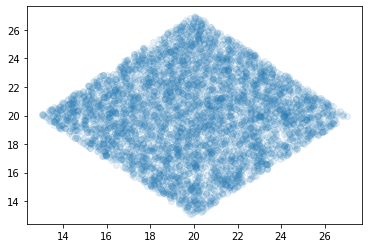

Factor de rendimiento: 1.0


In [4]:
#A)

#Variable que indica cuántos puntos aleatorios son generados, modificar para cambiar la cantidad
n = 5000

#Variable que indica la opacidad de los puntos, mientras más cercana sea al 0 más transparentes son,
#mientras más cercana sea a 1 más opacos son
alpha = 0.1

#Genera un cuadrado usando la funcion estandar de la distribucion uniforme
def rand_cuadrado_estandar(cant_numeros):
    return generar_random_cuadrado(cant_numeros, rand_estandar)

randoms_estandar = rand_cuadrado_estandar(n)
plt.scatter(*zip(*randoms_estandar[1]), alpha = alpha)
plt.show()
print("Factor de rendimiento: " + str(randoms_estandar[0]))

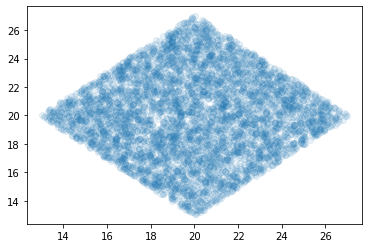

Factor de rendimiento: 1.0


In [5]:
#B)

#Genera un cuadrado usando la funcion del punto 1 de la distribucion uniforme
def rand_cuadrado_propio(cant_numeros):
    return generar_random_cuadrado(cant_numeros, rand_propio)

randoms_propios = rand_cuadrado_propio(n)
plt.scatter(*zip(*randoms_propios[1]), alpha = alpha)
plt.show()
print("Factor de rendimiento: " + str(randoms_propios[0]))
#Hacer test para la distribucion

Puede verse, como era esperado, que el rendimiento en ambos casos es 1. Esto se debe a que los puntos generados se encuentran dentro de la región que se transformará a la región buscada, todos los puntos generados se encontrarán en la región buscada finalmente.

Puede verse también que ambas regiones generadas tienen una distribución uniforme ya que no hay ninguna región que tenga una gran concentración de puntos. Esto se cumple tanto para los puntos generados con la distribución uniforme estándar como para los generados con el generador congruencial lineal del ejercicio 1.

In [6]:
#Para ver si los puntos estan distribuidos de forma uniforme en la region del cuadrado se puede generar 
#un sistema de coordenadas situado en la punta izquierda de la región pegado al perímetro de la región y
#con este ver si tanto la posicion x como la y siguen distribuciones uniformes, para esto se usara el test de
#Chi**2 discretizando las variables

#Realizo una traslación de los puntos que sigue manteniendo la distribución uniforme
#del cuadrado
#También puede tomarse como ver la posición de los puntos utilizando ejes que se encuentran en 
#el borde izquierdo de la región, pegados a la figura. Tomando esta postura es evidente que 
#se mantiene la uniformidad de los puntos generados
def trasladar_puntos(puntos_x_y):
    ret = []
    aux = 0
    for i in range(len(puntos_x_y)):
        aux = puntos_x_y[i]
        u = -(aux[0] - aux[1] - 5 * mt.sqrt(2)) * (mt.sqrt(2)/2)
        v = (aux[0] + aux[1] + 5 * mt.sqrt(2) - 40) * (mt.sqrt(2)/2)
        ret.append((u, v))
    return ret
        
#Separo los puntos en listas para cada coordenada
def separar_en_listas(tuplas):
    primer_elemento = []
    segundo_elemento = []
    for i in range(len(tuplas)):
        primer_elemento.append(tuplas[i][0])
        segundo_elemento.append(tuplas[i][1])
    return (primer_elemento, segundo_elemento)
    
#Se aplica el test Chi**2 sobre los puntos generados
def test_chi2(valores, niv_significacion = 0.05):
    #Discretizo los valores obtenidos para poder usar el Chi**2 teniendo una distribución
    #continua
    ancho = 1
    frecuencias = {}
    for i in range(len(valores)):
        bin = str(mt.floor(valores[i]/ancho))
        if bin in frecuencias:
            frecuencias[bin] += 1
        else:
            frecuencias[bin] = 1
    prob_bin = 1/len(frecuencias)
    d2 = 0
    
    #Aplico Chi**2 sobre los valores discretizados
    for i in range(len(frecuencias)):
        d2 += (frecuencias[str(i)] - len(valores) * prob_bin)**2/(len(valores) * prob_bin)
    return d2 <= chi2.ppf(1 - niv_significacion, df=len(frecuencias)-1)
    
    
def test_uniformidad(puntos_generados):
    puntos_u_v = trasladar_puntos(puntos_generados)
    lista_u, lista_v = separar_en_listas(puntos_u_v)
    return test_chi2(lista_u) and test_chi2(lista_v)

if test_uniformidad(randoms_estandar[1]):
    print("El cuadrado random con funciones aleatorias estandar es uniforme")
if test_uniformidad(randoms_propios[1]):
    print("El cuadrado random con funciones aleatorias propias es uniforme")

El cuadrado random con funciones aleatorias estandar es uniforme
El cuadrado random con funciones aleatorias propias es uniforme


Puede concluirse entonces que ambos generadores utilizados cumplen con la uniformidad en su región, ya que los tests utilizados lo confirman.